# ENERGY OPTIMIZATION OF MOBILE OS

In [68]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [69]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class NeuralNetwork(object):
    def __init__(self, cell_num_list):
        self.__layer_num = len(cell_num_list) - 1
        self.__weight_list = []
        self.__bias_list = []
        for i in range(self.__layer_num):
            weight = np.random.normal(size=(cell_num_list[i], cell_num_list[i + 1]))
            bias = np.zeros((1, cell_num_list[i + 1]))
            self.__weight_list.append(weight)
            self.__bias_list.append(bias)

    def predict(self, x):
        if len(x.shape) == 1:
            x.reshape(-1, len(x))
        a = x
        for i in range(self.__layer_num):
            z = np.dot(a, self.__weight_list[i]) + self.__bias_list[i]
            a = sigmoid(z)
        return a

    def __CostGradient(self, x, y):
        a_list = []
        a = x
        for i in range(self.__layer_num):
            a_list.append(a)
            z = np.dot(a, self.__weight_list[i]) + self.__bias_list[i]
            a = sigmoid(z)
        cost = np.sum((y - a) ** 2) / 2 / len(a)
        delta_list = []
        delta = (a - y) * a * (1 - a)
        for i in range(self.__layer_num):
            delta_list.append(delta)
            delta = np.dot(delta, self.__weight_list[-1 - i].T) * a_list[-1 - i] * (1 - a_list[-1 - i])
        delta_list.reverse()
        bias_gradient_list = []
        for i in range(self.__layer_num):
            bias_gradient = np.sum(delta_list[i], axis=0, keepdims=True) / len(x)
            bias_gradient_list.append(bias_gradient)
        weight_gradient_list = []
        for i in range(self.__layer_num):
            weight_gradient = np.dot(a_list[i].T, delta_list[i]) / len(x)
            weight_gradient_list.append(weight_gradient)
        return cost, weight_gradient_list, bias_gradient_list

    def train(self, x, y, alpha=0.1, iteration_num=10000):
        cost_list = []
        for _ in range(iteration_num):
            cost, weight_gradient_list, bias_gradient_list = self.__CostGradient(x, y)
            cost_list.append(cost)
            for i in range(self.__layer_num):
                self.__weight_list[i] -= alpha * weight_gradient_list[i]
                self.__bias_list[i] -= alpha * bias_gradient_list[i]
        plt.plot(range(iteration_num), cost_list), plt.xlabel('iteration number'), plt.ylabel('cost')


In [70]:
def ComputeAccuracy(net, x_test, y_test):
    pred = net.predict(x_test)
    temp = 0
    row, column = pred.shape
    for i in range(row):
        for j in range(column):
            if pred[i, j] >= 0.5:
                pred[i, j] = 1
            else:
                pred[i, j] = 0
        if (pred[i] == y_test[i]).all():
            temp += 1
    acc = temp / row
    return acc

In [82]:
def ReadData(filename):
    f = open(filename, 'r')
    dataset = f.readlines()
    f.close()
    for i in range(len(dataset)):
        dataset[i] = dataset[i].rstrip().split(',')
        for j in range(1,4):
            dataset[i][j] = float(dataset[i][j])
    random.shuffle(dataset)
    test_dataset = dataset[:50]
    train_dataset = dataset[50:]
    x_train = []
    y_train = []
    for data in train_dataset:
        x_train.append(data[:-1])
        if data[5] == 20140501:
            y_train.append([1, 0, 0])
        if data[5] == 20140502:
            y_train.append([0, 1, 0])
        if data[5] == 20140503:
            y_train.append([0, 0, 1])
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = []
    y_test = []
    for data in test_dataset:
        x_test.append(data[:-1])
        if data[5] == 20140501:
            y_test.append([1, 0, 0])
        if data[5] == 20140502:
            y_test.append([0, 1, 0])
        if data[5] == 20140503:
            y_test.append([0, 0, 1])
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test

In [83]:
def main1():
    # read data
    x_train, y_train, x_test, y_test = ReadData('data.txt')

    # generate a neural network
    net = NeuralNetwork([4, 20, 10, 3])

    # train the neural network
    net.train(x_train, y_train)

    # compute the accuracy of net
    acc = ComputeAccuracy(net, x_test, y_test)
    print('Accuracy is:', acc)

    # show image
    plt.show()

In [84]:
def main2():
    # negerate a set of data
    x = np.eye(10)
    x = np.concatenate((x, x, x, x, x, x, x, x, x, x), axis=0)

    # generate a autoencoder neural network,cells in input and output layers are more,but cells in hidden layer are less
    # you can change cell number of hidden layer to any integer value less than 10
    autoencoder_net = NeuralNetwork([10, 5, 10])

    # train the neural network
    autoencoder_net.train(x, x)

    # compute the accuracy of net
    acc = ComputeAccuracy(autoencoder_net, x, x)
    print('Accuracy is:', acc)

    # show image
    plt.show()

Accuracy is: 0.94


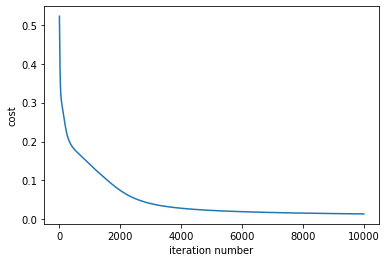

Accuracy is: 0.8


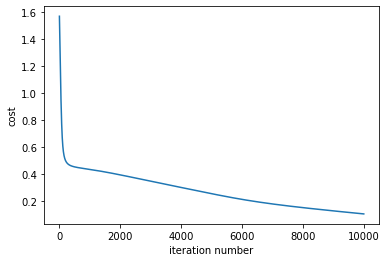

In [85]:
if __name__ == '__main__':
    main1()
    main2()